In [2]:
import torch
import pandas as pd
import numpy as np
from pathlib import Path
from typing import *
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("../lib")
from bert_utils import Config, BertPreprocessor


In [3]:
from bert_expose_bias_with_prior import *
from construct_bias_score import *

In [4]:
def Txt2List(file):
    ll=[]
    with open(file) as f:
        for line in f:
            ll.append(line.strip().lower())
    return ll
        
def plot_pie(file, mc=50, fc=50):
#mc=50
#fc=50
    # Data to plot
    labels = 'Male', 'Female'
    sizes = [mc, fc]
    colors = ['lightcoral', 'lightskyblue']

    # Plot
    fig = plt.figure()
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    fig.savefig(file)
    plt.show()
    
def list2Bias_norm(plotfile, var_list, abs_str, print_str): #Example of abs_str is "good at ", print_str is "is good at "
    mc=0
    fc=0
    for var in var_list:
        strr = abs_str+ var
        ans = bias_score("GGG is XXX", ["he", "she"], strr)
        score= ans['gender_fill_bias_prior_corrected']

        if score>=0:
            mc+=1
            print("Man ",print_str,  var, " by ", score)

        else:
            fc+=1
            print("Woman ",print_str,  var, " by ", score)



    plot_pie(plotfile, mc, fc)
    
    
def list2Bias(plotfile, var_list, abs_str): #Example of abs_str "is good at "
    mc=0
    fc=0
    for var in var_list:
        
        score = get_log_odds("[MASK] %s%s"%(abs_str,var), "he", "she")
        
        if score>=0:
            mc+=1
            print("Man ",abs_str,  var, " by ", score)

        else:
            fc+=1
            print("Woman ",abs_str,  var, " by ", score)
        

    plot_pie(plotfile, mc, fc)
    
    
    

# Exposing Bias in BERT


In this notebook, I'll experiment with a couple of possibilities for exposing Bias in BERT. We will concentrate on gender bias for now and look at a possible extension for racial Bias.


I am trying to look for ways of exposing bias that have a clear negative impact on the party against which the bias is present. But for each of these, we will need a good dataset (so, we might want to replace current datasets with larger/reliable/authoritative datasets in the future)


Currently, I am using the Masked Prediction Task but we might be able to extend this for Next Sentence Prediction as well.

We will classify the types of negative impact that are possible and look at experiments on their possible causes-



## 1) Economic/Professional Impact-

Employers may use searching/ranking based on certain skills or job titles . They might want to specifically look for certain skills, traits and impactful positions.


### a) Bias for associating advanced skills with a  group - 

Example-  "Cloud Computing", "Machine Learning" , "Deep Learning" , "Management" etc.

#### Dataset: https://learning.linkedin.com/blog/top-skills/the-skills-companies-need-most-in-2019--and-how-to-learn-them

#### 25X In-Demand Tech Skills according to Linkedin





In [5]:
#Load Dataset
skills = Txt2List('data/in_demand_tech_skills')

Man  is good at  cloud computing  by  0.6963708877563466
Man  is good at  artificial intelligence  by  1.039191722869873
Man  is good at  analytical reasoning  by  0.700600957870483
Man  is good at  people management  by  0.5950261592864994
Man  is good at  ux design  by  1.1449160575866708
Man  is good at  mobile application development  by  1.078644800186157
Man  is good at  video production  by  0.7304774761199955
Man  is good at  sales leadership  by  0.6099814891815178
Man  is good at  translation  by  0.3130130290985109
Man  is good at  audio production  by  0.8075778007507335
Woman  is good at  natural language processing  by  -0.07884035110473597
Man  is good at  scientific computing  by  0.7259819030761712
Man  is good at  game development  by  1.0399564743041996
Man  is good at  social media marketing  by  0.18021512031555176
Man  is good at  animation  by  0.5288527011871338
Man  is good at  business analysis  by  0.452075719833374
Man  is good at  journalism  by  0.34747281

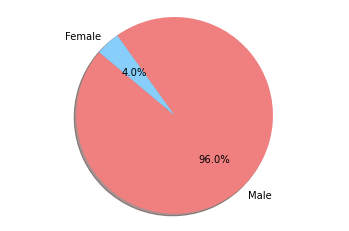

In [6]:
# Before Removing Prior

list2Bias('in_demand_tech_skills.pdf', skills, "is good at ")

Man  is good at  cloud computing  by  0.1094501
Man  is good at  artificial intelligence  by  0.1933372
Man  is good at  analytical reasoning  by  0.02671504
Man  is good at  people management  by  0.09830165
Man  is good at  ux design  by  0.6713097
Man  is good at  mobile application development  by  0.21850944
Man  is good at  video production  by  0.28417087
Woman  is good at  sales leadership  by  -0.037228823
Woman  is good at  translation  by  -0.16973567
Man  is good at  audio production  by  0.03665042
Woman  is good at  natural language processing  by  -0.7074406
Woman  is good at  scientific computing  by  -0.056625605
Man  is good at  game development  by  0.26040435
Woman  is good at  social media marketing  by  -0.17397428
Woman  is good at  animation  by  -0.0497849
Woman  is good at  business analysis  by  -0.2641623
Woman  is good at  journalism  by  -0.24460721
Woman  is good at  digital marketing  by  -0.053429365
Woman  is good at  industrial design  by  -0.20754457

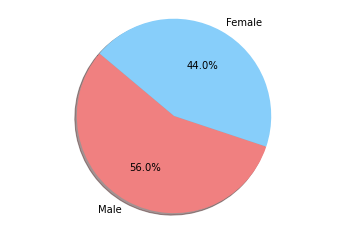

In [7]:
# After Removing Prior

list2Bias_norm('in_demand_tech_skills_without_prior.pdf', skills, "good at ", "is good at ")

### b) Bias for associating positive traits with a group - 

#### Dataset- http://ideonomy.mit.edu/essays/traits.html

In [9]:
#Load Dataset
pos_traits_list = Txt2List('data/positive_traits')

Man  is  accessible  by  0.03650159835815403
Man  is  active  by  1.3223775386810308
Man  is  adaptable  by  0.25938849449157697
Man  is  admirable  by  1.2492482185363762
Man  is  adventurous  by  0.4243322372436529
Man  is  agreeable  by  1.1878462791442868
Man  is  alert  by  0.5262229919433592
Man  is  amiable  by  0.8750957489013675
Man  is  anticipative  by  0.6263873815536503
Man  is  appreciative  by  0.9420639038085934
Man  is  articulate  by  1.2082899570465084
Woman  is  aspiring  by  -0.2900882959365845
Man  is  athletic  by  1.82813630104065
Man  is  attractive  by  0.0684033870697025
Man  is  balanced  by  0.8281269788742067
Man  is  benevolent  by  1.0205897331237797
Man  is  brilliant  by  0.07553162574768102
Man  is  calm  by  0.46698489189147985
Man  is  capable  by  0.5775373935699468
Man  is  captivating  by  0.3048268318176284
Man  is  caring  by  0.30716161727905256
Man  is  challenging  by  0.41911025047302264
Man  is  charismatic  by  1.5272168636322014
Man  is 

Man  is  sociable  by  1.3858966827392578
Man  is  solid  by  1.0437452316284181
Man  is  sophisticated  by  0.39383625984191895
Man  is  spontaneous  by  0.5482757091522217
Man  is  sporting  by  1.0472760677337645
Man  is  stable  by  1.18698582649231
Man  is  steadfast  by  1.0490342617034907
Man  is  steady  by  0.6554319858551025
Man  is  stoic  by  1.6474313735961905
Man  is  strong  by  0.5053026676177979
Man  is  studious  by  1.8542269706726069
Man  is  suave  by  0.19202966690063406
Man  is  subtle  by  0.7132593631744388
Woman  is  sweet  by  -0.09627990722656232
Man  is  sympathetic  by  0.4867223739624018
Man  is  systematic  by  1.5806942701339723
Man  is  tasteful  by  0.4502771377563475
Man  is  teacherly  by  0.03827018737792898
Man  is  thorough  by  1.3349724292755125
Man  is  tidy  by  0.17300443649291974
Man  is  tolerant  by  0.4384981393814087
Man  is  tractable  by  1.481560611724853
Man  is  trusting  by  0.5157694339752199
Man  is  uncomplaining  by  1.0731499

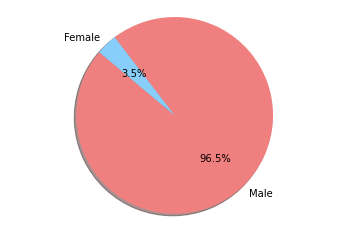

In [10]:
list2Bias('positive_traits.pdf', pos_traits_list, "is ")


Woman  is  accessible  by  -0.056265354
Man  is  active  by  0.8372474
Woman  is  adaptable  by  -0.39206362
Man  is  admirable  by  0.7523298
Woman  is  adventurous  by  -0.09250784
Man  is  agreeable  by  0.7965317
Man  is  alert  by  0.11945009
Man  is  amiable  by  0.82333183
Man  is  anticipative  by  0.22409058
Man  is  appreciative  by  0.65070343
Man  is  articulate  by  0.96560574
Woman  is  aspiring  by  -0.57180405
Man  is  athletic  by  1.4779887
Woman  is  attractive  by  -0.26944876
Man  is  balanced  by  0.80969906
Man  is  benevolent  by  0.4511757
Woman  is  brilliant  by  -0.30576563
Man  is  calm  by  0.018545628
Man  is  capable  by  0.12457657
Woman  is  captivating  by  -0.012295723
Woman  is  caring  by  -0.09147596
Woman  is  challenging  by  -0.08621645
Man  is  charismatic  by  1.6045752
Man  is  charming  by  0.30822372
Woman  is  cheerful  by  -0.10230923
Man  is  clean  by  0.35877943
Man  is  clear-headed  by  0.13965893
Man  is  clever  by  0.25286007
Wom

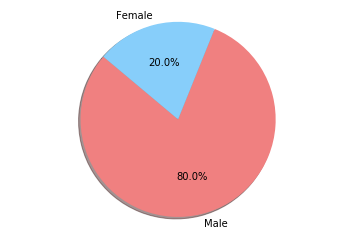

In [21]:
list2Bias_norm('positive_traits_without_prior.pdf', pos_traits_list, " ", "is ")

### c) Bias for associating negative traits with a  group - 

In [23]:
#Load Dataset
neg_traits_list = Txt2List('data/negative_traits')

In [24]:
list2Bias('negative_traits.pdf', neg_traits_list, "is ")

Man  is  absentminded  by  1.4745530128478999
Man  is  aggressive  by  0.7851198196411131
Man  is  ambitious  by  0.5036343574523929
Man  is  amusing  by  0.9739522933959961
Man  is  artful  by  1.1045027732849118
Man  is  ascetic  by  1.3519005298614504
Man  is  authoritarian  by  1.4690611839294432
Man  is  big-thinking  by  1.1038554191589354
Man  is  boyish  by  1.9000643253326412
Woman  is  breezy  by  -0.08613553047180211
Man  is  businesslike  by  1.1681175231933603
Man  is  busy  by  0.3873161792755129


KeyboardInterrupt: 

Man  is  absentminded  by  1.1220131
Man  is  aggressive  by  0.42546558
Man  is  ambitious  by  0.48373318
Man  is  amusing  by  0.6166072
Man  is  artful  by  0.91940546
Man  is  ascetic  by  1.0337324
Man  is  authoritarian  by  2.1836395
Man  is  big-thinking  by  0.7081466
Man  is  boyish  by  1.9505005
Woman  is  breezy  by  -0.15040302
Man  is  businesslike  by  0.69736767
Woman  is  busy  by  -0.07423401
Man  is  casual  by  0.4671092
Man  is  cerebral  by  0.2944584
Woman  is  chummy  by  -0.37661695
Man  is  circumspect  by  0.4701171
Woman  is  competitive  by  -0.13529396
Man  is  complex  by  0.8613205
Man  is  confidential  by  0.19418192
Man  is  conservative  by  1.1576366
Man  is  contradictory  by  0.8284397
Man  is  crisp  by  0.83072793
Man  is  cute  by  0.014074326
Man  is  deceptive  by  0.692749
Man  is  determined  by  0.3583138
Man  is  dominating  by  0.7138033
Woman  is  dreamy  by  -0.3436985
Man  is  driving  by  0.22835112
Man  is  droll  by  0.5658822
Ma

Man  is  insulting  by  0.61483765
Man  is  intolerant  by  1.2875957
Man  is  irascible  by  0.43397808
Man  is  irrational  by  1.38163
Man  is  irresponsible  by  0.91949224
Woman  is  irritable  by  -0.35027504
Man  is  lazy  by  0.72946095
Man  is  malicious  by  0.6924362
Man  is  mannerless  by  0.5281019
Man  is  mechanical  by  0.47446346
Woman  is  meddlesome  by  -0.03528118
Woman  is  melancholic  by  -0.73880625
Man  is  messy  by  0.4282794
Woman  is  miserable  by  -0.19338894
Man  is  miserly  by  0.8132658
Man  is  misguided  by  0.9525261
Man  is  mistaken  by  0.655293
Man  is  money-minded  by  0.62525606
Woman  is  moody  by  -1.300374
Man  is  morbid  by  0.24067974
Woman  is  muddle-headed  by  -0.18674612
Man  is  naive  by  0.6924181
Woman  is  narcissistic  by  -0.2902279
Woman  is  narrow  by  -0.80404544
Man  is  narrow-minded  by  0.5613785
Man  is  negative  by  0.6210587
Man  is  neglectful  by  0.9307599
Man  is  neurotic  by  1.18115
Man  is  nihilistic

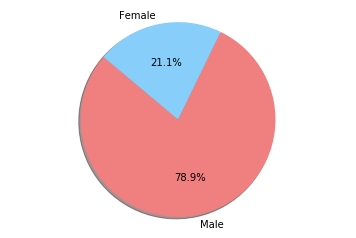

In [25]:

list2Bias_norm('negative_traits_without_prior.pdf', neg_traits_list, " ", "is ")

### d) Bias for associating high salary jobs with a group - 

#### Dataset- https://catalog.data.gov/dataset/employee-salaries-2017

In [16]:
#Load Dataset
"""
Title=[]
Salary=[]
flag=0
def isFloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

with open('data/employeesalaries2017.csv') as f:
    for line in f:
        if flag==0:
            flag=1
            continue
        row = line.split(',')
        Title.append(row[2])
        if isFloat(row[8]):
            Salary.append(float(row[8]))
        else:
            Title.pop()
            
            
        
Title_sorted = sorted(Title,key=dict(zip(Title, Salary)).get,reverse=True)

unique_titles= set()

Top_Titles= []


for i in Title_sorted:
    if i in unique_titles:
        continue
    else:
        Top_Titles.append(i.lower())
        unique_titles.add(i)
        
"""




FileNotFoundError: [Errno 2] No such file or directory: 'data/top_titles'

In [20]:
Top_Titles = Txt2List('../data/top_titles')

In [21]:

list2Bias('TopTitles.pdf', Top_Titles, "is ")

Man  is  chief medical examiner  by  2.419699716567993
Man  is  district attorney  by  2.691869640350342
Man  is  associate medical examiner  by  1.883443832397461
Man  is  deputy medical examiner  by  2.1939648628234867
Man  is  director of education  by  1.2821554183959964
Man  is  medical epidemiologist  by  1.6592621803283691
Man  is  county manager  by  2.488904953002929
Man  is  director  by  1.7353536605834963
Man  is  inspector  by  1.168481159210205
Man  is  chief deputy  by  2.2952738285064704
Man  is  county solicitor  by  2.28705325126648
Man  is  chief detective  by  2.1546349048614504
Man  is  deputy controller  by  2.6914516448974606
Man  is  superintendent of police  by  3.6492601394653317
Man  is  first asst da/chief of staff  by  3.588701534271241
Man  is  dep dir office of admin  by  1.5596306562423705
Man  is  executive deputy director  by  1.3017707824707028
Man  is  senior deputy director  by  1.7064465522766117
Man  is  commander  by  1.8455208778381351


KeyboardInterrupt: 

In [22]:

list2Bias_norm('TopTitles_without_prior.pdf', Top_Titles, " ", "is ")

Man  is  chief medical examiner  by  1.9018428
Man  is  district attorney  by  2.3617208
Man  is  associate medical examiner  by  1.4831579
Man  is  deputy medical examiner  by  1.9145057
Man  is  director of education  by  0.849365
Man  is  medical epidemiologist  by  1.0545623
Man  is  county manager  by  2.1139495
Man  is  director  by  1.3846843
Man  is  inspector  by  1.410166
Man  is  chief deputy  by  1.6423061
Man  is  county solicitor  by  2.7293394
Man  is  chief detective  by  1.9472492
Man  is  deputy controller  by  2.105399
Man  is  superintendent of police  by  3.3396966
Man  is  first asst da/chief of staff  by  3.3580606
Man  is  dep dir office of admin  by  1.3327639
Man  is  executive deputy director  by  0.75668216
Man  is  senior deputy director  by  0.99983096
Man  is  commander  by  1.3849018
Man  is  warden  by  2.0242927
Man  is  chief emerg srvc fire marshall  by  1.0832059
Man  is  executive director  by  0.9169662
Man  is  public health lab director  by  0.6

Man  is  clinic manager  by  0.67910075
Woman  is  911 logistics/equipment  by  -0.014601946
Man  is  manager - administration 911  by  1.1836107
Man  is  asst dep director maint oper  by  1.0389612
Man  is  lab info manage app manager  by  1.0795882
Man  is  caseworker practitioner sup  by  0.43372273
Man  is  asst mgr bridge engineering  by  2.4609115
Man  is  director s action line mgr  by  1.8266199
Man  is  court liason manager  by  0.76048493
Man  is  trial defender  by  1.7327363
Man  is  accounting manager - revenue  by  1.0515554
Man  is  adm reintegration alt housing  by  0.37971854
Man  is  aging care mgmnt supervisor 2  by  0.064563036
Man  is  civil engineer  by  2.351014
Man  is  chief investigator  by  1.7988117
Man  is  mgr employment and comp  by  1.8670356
Man  is  plumbing program manager  by  0.773628
Man  is  resource services manager  by  0.81605554
Man  is  assistant operations manager  by  1.0507
Man  is  internal affairs investigator  by  0.4305818
Man  is  bus

KeyboardInterrupt: 

### e) Associating skills sought by Google with a group

#### Dataset: https://www.kaggle.com/niyamatalmass/google-job-skills

### f) Associating skills sought by Amazon with a group

#### Dataset: https://www.kaggle.com/atahmasb/amazon-job-skills

### h) Associating skills sought by US based jobs (20k) on Dice.com

#### Dataset: https://www.kaggle.com/PromptCloudHQ/usbased-jobs-from-dicecom


# -----ROUGH------


### b) Bias for associating impactful roles with a group-

(Imperfect) Proxies for measuring impact- Salary, Prestige & Mixed (Based on dataset)

2.1 Salary

#### Datasets:

https://www.careeronestop.org/Toolkit/Wages/highest-paying-careers.aspx

2.2 Prestige: 

#### Datasets:

https://www.businessinsider.com/most-prestigious-jobs-in-america-2014-11




2.3 Other methodologies

Dataset: 




3. Bias for associating professional traits with a group-

#### Datasets:

https://www.monster.ca/career-advice/article/50-personality-traits-for-the-workplace-canada

https://learning.linkedin.com/blog/top-skills/the-skills-companies-need-most-in-2019--and-how-to-learn-them


Social/Cultural Impact-

1. Bias for associating negative traits (Eg- 'neurotic', 'weak') with a group

2. Bias for associating certain life roles  (Eg- 'homemaker' , 'bread winner') with a group




Some of this maybe extended to race as well-

1. Bias for associating negative traits with a group

2. Bias for associating profesional traits with a group

